1) En este ejercicio demostramos la convergencia del algoritmo del perceptrón para el caso cuando los datos son linealmente separables. Tomamos $\alpha = 0$ para limitarnos a hiperplanos que pasan por el origen. $y_i \in \{-1, 1\}$ y $z_i = x_i \times y_i$. Buscamos $\beta$ tal que 

$$\forall i: \beta^tz_i > 0$$

Podemos rescalar las observaciones tal que la norma de $z_i$ siempre sea menor que 1.

Calculamos  
\begin{equation}  
    \beta_{n+1} = \beta_n + z_i I(\beta_nz_i \leq 0) 
\end{equation}

a) Si los datos son linealmente separables, demuestra que existe una $\beta_{opt}$ tal que $$\beta_{opt}^tz_i \geq 1$$

Por definición, cuando los datos son linealmente separables existe una $\beta$ tal que $\beta^tz_i >0$, lo cual equivale a $\beta^tz_i > \epsilon$ donde $\epsilon > 0$, dividiendo ambos lados por $\epsilon$ obtenemos $\frac{1}{\epsilon}\beta^tz_i = 1$. Por lo que basta tomar $\beta_{opt} = \frac{1}{\epsilon}\beta^t$ para que se cumpla que $\beta_{opt}^tz_i \geq 1$

b) Usando la anterior, verifica que si obtenemos $\beta_{n+1}$ usando (1) para una $z_i$ mal clasificada: 
$$ 0 \leq ||\beta_{n+1} - \beta_{opt}||^2 \leq ||\beta_{n} - \beta_{opt}||^2 - 1$$

$ 0 \leq ||\beta_{n+1} - \beta_{opt}||^2 $ se cumple ya que $||\cdot||^2 \geq 0 $ para la segunda parte tenemos que

\begin{align*}
    ||\beta_{n+1} - \beta_{opt}||^2 &= (\beta_{n+1} - \beta_{opt})^T(\beta_{n+1} - \beta_{opt})\\
    &= ||\beta_{n+1}||^2 -2\beta_{opt}^T\beta_{n+1} + ||\beta_{opt}||^2||\\
    &= ||\beta_n + z_i||^2 -2\beta_{opt}^T(\beta_n + z_i) + ||\beta_{opt}||^2\\
    &= ||\beta_n||^2 + 2\beta_n^Tz_i +||z_i|| - 2\beta_{opt}^T\beta_n -2\beta_{opt}^Tz_i + ||\beta_{opt}||^2\\
    &= ||\beta_n||^2 - 2\beta_{opt}^T\beta_n + ||\beta_{opt}||^2 + 2\beta_n^Tz_i +||z_i|| - 2\beta_{opt}^Tz_i \\
    &= ||\beta_{n} - \beta_{opt}||^2 +||z_i|| + 2\beta_n^Tz_i - 2\beta_{opt}^Tz_i \\
    &= ||\beta_{n} - \beta_{opt}||^2 +||z_i|| + 2(\beta_n^Tz_i - \beta_{opt}^Tz_i) \\
\end{align*}

Tenemos que $||z_i||^2 < 0$ ya que así lo declaramos, y que $\beta_n^Tz_i \leq 0$ y $\beta_{opt}^Tz_i \geq 1$, con esto podemos ver que $\beta_n^Tz_i - \beta_{opt}^Tz_i \leq -1$ por lo que 
\begin{align*}
||\beta_{n+1} - \beta_{opt}||^2 &= ||\beta_{n} - \beta_{opt}||^2 +||z_i|| + 2(\beta_n^Tz_i - \beta_{opt}^Tz_i)\\
&= ||\beta_{n} - \beta_{opt}||^2 + 1 -2\\
&= ||\beta_{n} - \beta_{opt}||^2 - 1\\
\end{align*}

c) Explica que lo anterior significa que en un tiempo finito $\beta_n$ debe converger.

Si tenemos una $\beta_0$ inicial y en cada iteración $ 0 \leq ||\beta_{n+1} - \beta_{opt}||^2 \leq ||\beta_{n} - \beta_{opt}||^2 - 1$, podemos ver que despues de $n$ iteraciones nuestro $\beta_0$ convergería a $\beta_{opt}$, donde $n = ||\beta_0 - \beta_{opt}||^2$

2) Este ejercicio es sobre el método de clasificación para detectar billetes falsos
Iniciamos cargando los datos

In [1]:
data <- read.table("data_banknote_authentication.txt", header=FALSE, sep=",")
colnames(data) <- c("Variance", "Skewness", "Kurtosis", "Entropy", "Label")
head(data)

Variance,Skewness,Kurtosis,Entropy,Label
3.62160,8.6661,-2.8073,-0.44699,0
4.54590,8.1674,-2.4586,-1.46210,0
3.86600,-2.6383,1.9242,0.10645,0
3.45660,9.5228,-4.0112,-3.59440,0
0.32924,-4.4552,4.5718,-0.98880,0
4.36840,9.6718,-3.9606,-3.16250,0


Podemos ver algo de información de los datos para la categoaría 0 y la 1

In [2]:
summary(data[data[, 5] == 0, ][1:4])

    Variance          Skewness          Kurtosis          Entropy       
 Min.   :-4.2859   Min.   :-6.9321   Min.   :-4.9417   Min.   :-8.5482  
 1st Qu.: 0.8833   1st Qu.: 0.4501   1st Qu.:-1.7097   1st Qu.:-2.2283  
 Median : 2.5531   Median : 5.6688   Median : 0.7006   Median :-0.5524  
 Mean   : 2.2767   Mean   : 4.2566   Mean   : 0.7967   Mean   :-1.1476  
 3rd Qu.: 3.8845   3rd Qu.: 8.6920   3rd Qu.: 2.6529   3rd Qu.: 0.4233  
 Max.   : 6.8248   Max.   :12.9516   Max.   : 8.8294   Max.   : 2.4495  

In [3]:
summary(data[data[, 5] == 1, ][1:4])

    Variance          Skewness           Kurtosis          Entropy       
 Min.   :-7.0421   Min.   :-13.7731   Min.   :-5.2861   Min.   :-7.5887  
 1st Qu.:-3.0614   1st Qu.: -5.8100   1st Qu.:-1.3575   1st Qu.:-2.4584  
 Median :-1.8061   Median :  0.1728   Median : 0.3737   Median :-0.6616  
 Mean   :-1.8684   Mean   : -0.9936   Mean   : 2.1483   Mean   :-1.2466  
 3rd Qu.:-0.5418   3rd Qu.:  3.1893   3rd Qu.: 5.6264   3rd Qu.: 0.3418  
 Max.   : 2.3917   Max.   :  9.6014   Max.   :17.9274   Max.   : 2.1353  

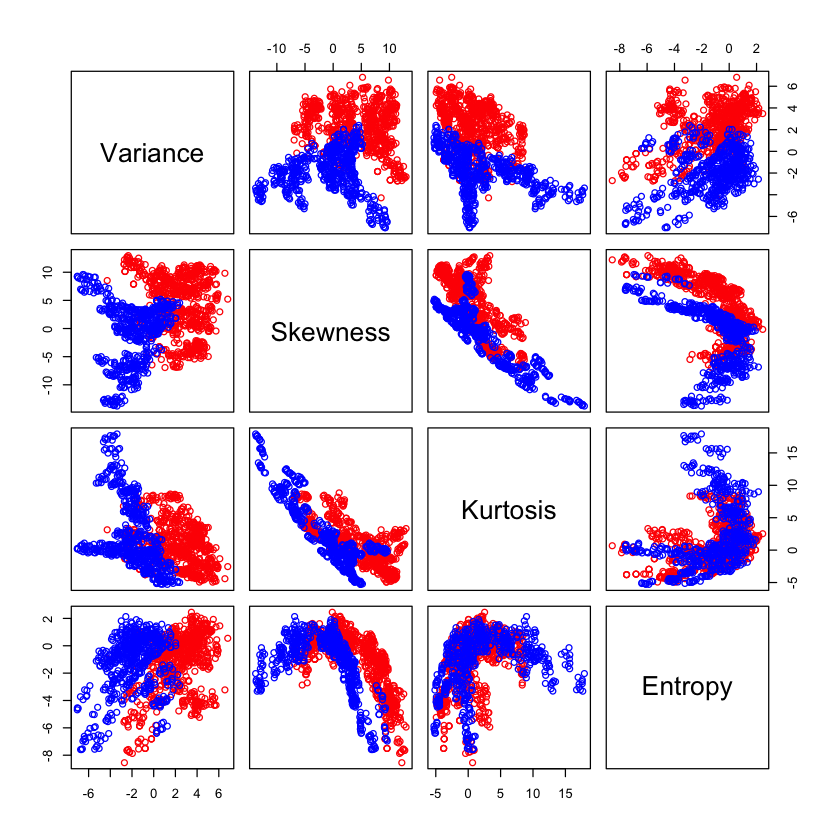

In [4]:
pairs(data[1:4], col=2*(1+ data[, 5]))

Creamos una función para comparar el desempeño de KNN vs Red Neuronal

In [5]:
library("class") # contiene knn(...)
library("nnet")  # contiene red-neuronal
knn_nnet <- function(data, k=2, train_percent=0.75) {
    data <- data[sample(nrow(data)),]
    sample_sz  <- floor(train_percent * nrow(data))
    train <- head(data, sample_sz)
    test  <- tail(data, nrow(data) - sample_sz)

    train_data  <- train[1:4]
    train_label <- train[, 5]

    test_data  <- test[1:4]
    test_label <- test[, 5]
    
    # predecir con k-vecinos
    knn_res  <- knn(train=train_data, test=test_data, cl=train_label, k=k)
    # crea red neuronal
    neuronal <- nnet(class.ind(train_label)~Variance+Skewness+Kurtosis+Entropy, 
                     size=4, softmax=T, data=train_data, trace=FALSE)
    nn_res <- predict(neuronal, test_data) #predecir con la red neuronal
    nn_res <- as.numeric(nn_res[,1] < nn_res[,2]) #poner en mismo formato que knn
 
    knn_correct  <- sum(test_label == knn_res)
    nnet_correct <- sum(test_label == nn_res)
    
    knn_p  <- knn_correct/nrow(test_data)
    nnet_p <- nnet_correct/nrow(test_data)
    return (c(knn_p, nnet_p))
}

Corremos la prueba multiples veces y comparamos los resultados

In [6]:
res <- replicate(50, knn_nnet(data))

Vemos el resumen de las corridas para KNN

In [7]:
summary(res[1,])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9971  1.0000  1.0000  0.9995  1.0000  1.0000 

Y para la red neuronal

In [8]:
summary(res[2,])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9913  1.0000  1.0000  0.9992  1.0000  1.0000 

El desempeño de ambos es bastante similar, con KNN siendo un poco mejor en promedio.

3) Considera la siguiente función que surge de una red de base radial:
$$ f_{\sigma, \beta, \mu}(\text{in}) = \sum_{j=1}^{p}\beta_j\exp(-||\text{in} - \mu_j||^2/\sigma_j)$$

Para un conjunto de datos $\{(\text{in}^d, \text{out}^d)\}$define la función de costo

$$ E(\sigma, \beta, \mu) = \sum_{d}(\text{out}^d - f_{\sigma, \beta, \mu}(\text{in}^d))^2 $$

a) Calcula el gradiente de $E(\cdot)$

\begin{align*}
\frac{\partial E}{\partial\beta_j} &= -2\sum_{d} (\text{out}^d - f_{\sigma, \beta, \mu}(\text{in}^d)) \frac{\partial f}{\partial \beta_j}\\
&= -2\sum_{d} \Big( (\text{out}^d - f_{\sigma, \beta, \mu}(\text{in}^d)) \exp(-||\text{in} - \mu_j||^2/\sigma_j)\Big)
\end{align*}

\begin{align*}
    \frac{\partial E}{\partial\sigma_j} &= -2\sum_{d} (\text{out}^d - f_{\sigma, \beta, \mu}(\text{in}^d)) \frac{\partial f}{\partial \sigma_j}\\
    &= -2\sum_{d} \Big( (\text{out}^d - f_{\sigma, \beta, \mu}(\text{in}^d)) \beta_jexp(-||\text{in}-\mu_j||^2/\sigma_j) (||\text{in}-\mu_j||^2/\sigma_j^2)\Big)\\
\end{align*}

Es importante notar que la derivada parcial de la función de costo con respecto a $\mu_j$ es un vector.

\begin{align*}
    \frac{\partial E}{\partial\mu_j} &= -2\sum_{d} (\text{out}^d - f_{\sigma, \beta, \mu}(\text{in}^d)) \frac{\partial f}{\partial \mu_j}\\
     &= -2\sum_{d} \Big( (\text{out}^d - f_{\sigma, \beta, \mu}(\text{in}^d)) \beta_jexp(-||\text{in}-\mu_j||^2/\sigma_j) (2(\text{in} -\mu_j))\Big)\\
\end{align*}

Podemos implementar el método de gradiente decendente y usar los datos de los billetes para probar su efectividad.

Separamos la implementación en varias funciones

In [9]:
norm(data[1,1:4], type="2")

[1] 9.813155

In [10]:
norm_vec_sq <- function(x) sum(x^2)
f_test <- function(input, beta, mu, sigma) {
    val <- 0
    idx <- 0
    for(j in 1 : length(beta)){ #numero de gaussianas <- length(mu)
        ex <- exp(- norm_vec_sq(input - mu[j,]) / sigma[j])
        if(val < ex){
            val = ex
            idx = j - 1
        }
    }
    return(idx)
}
f_eval <- function(input, beta, mu, sigma) {
    val <- 0
    for(j in 1 : length(beta)){ #numero de gaussianas <- length(mu)
        ex <- exp(- norm_vec_sq(input - mu[j,]) / sigma[j])
        val <- val + beta[j] * ex
    }
    return(val)
}
costo <- function(data, beta, mu, sigma){
    cost <- 0
    for(i in 1:nrow(data)){
        item <- data[i,]
        f <- f_eval(item[1:4], beta, mu, sigma)
        cost = cost + (item[, 5] - f)^2
    }
    return(cost)
}
partial_beta <- function(data, beta, mu, sigma){
    partial <- rep(0, length(beta))
    for(j in 1:length(beta)){
        for(i in 1:nrow(data)){
            item <- data[i,]
            input <- item[1:4]
            aux <- exp(- norm_vec_sq(input - mu[j,]) / sigma[j])
            partial[j] = partial[j] + aux * (item[, 5] - f_eval(item[1:4], beta, mu, sigma))
        }
    }
    return(-2 * partial)
}
partial_sigma <- function(data, beta, mu, sigma){
    partial <- rep(0, length(sigma))
    for(j in 1:length(sigma)){
        for(i in 1:nrow(data)){
            item <- data[i,]
            input <- item[1:4] 
            aux <- exp(- norm_vec_sq(input - mu[j,]) / sigma[j]) * beta[j]
            aux = aux * norm_vec_sq(input - mu[j,]) / sigma[j]^2
            partial[j] = partial[j] + aux * (item[, 5] - f_eval(item[1:4], beta, mu, sigma))
        }
    }
    return(-2 * partial)
}
partial_mu <- function(data, beta, mu, sigma){
    partial <- as.data.frame(matrix(0L, nrow=nrow(mu), ncol=ncol(mu)))
    for(j in 1:nrow(mu)){
        for(i in 1:nrow(data)){
            item <- data[i,]
            input <- item[1:4] 
            aux <- exp(- norm_vec_sq(input - mu[j,]) / sigma[j]) * beta[j]
            aux = aux * 2 *(input - mu[j,])
            partial[j,] = partial[j,] + aux * (item[, 5] - f_eval(item[1:4], beta, mu, sigma))
        }
    }
    return(-2 * partial)
}

In [11]:
data_s <- data[sample(nrow(data)),]
sample_sz  <- floor(0.75 * nrow(data))
train <- head(data_s, sample_sz)
test  <- tail(data_s, nrow(data) - sample_sz)

In [12]:
mu <- train[3:4,1:4]
beta <- c(0.5, 0.5)
sigma <- c(1, 1)
print(costo(train, beta, mu, sigma))
for (i in 1:50){
    p_b <- partial_beta(train, beta, mu, sigma)
    beta = beta - 0.05 * p_b
    p_s <- partial_sigma(train, beta, mu, sigma)
    sigma = sigma - 0.05 * p_s
    p_u <- partial_mu(train, beta, mu, sigma)
    mu = mu - 0.05 * p_u
}   
print(costo(train, beta, mu, sigma))

[1] 451.4824
[1] 459.0008


Para evaluar, evaluamos la función y redondeamos para determinar su categoría

In [13]:
correct <- 0 
for(i in 1:nrow(test)){
    p <- round(f_test(test[i,1:4], beta, mu, sigma))
    if(p == test[i, 5]) correct = correct + 1
}
correct/nrow(train)

[1] 0.1661808

Como podemos ver el porcentaje de acertos es bastante bajo, pero esto podría mejorar si se dejara correr el algoritmo  hasta converger a una solución. Pero este proceso es bastante lento

In [14]:
means <- kmeans(train[1:4], 2)$centers

In [15]:
beta <- c(1, 1)
for (i in 1:20){
    p_b <- partial_beta(train, beta, means, c(1, 1))
    beta = beta - 0.05 * p_b
#     print(costo(train, beta, means, c(1, 1)))
}

In [16]:
correct <- 0 
for(i in 1:nrow(test)){
    p <- round(f_test(test[i,1:4], beta, means, c(1, 1)))
    if(p == test[i, 5]) correct = correct + 1
}
correct/nrow(train)

[1] 0.2060253